In [ ]:
import sys

sys.path.append("../src/spm")

import numpy as np
import matplotlib.pyplot as plt
import electrode_dynamics
import importlib

importlib.reload(electrode_dynamics)
from electrode_dynamics import *

In [2]:
F = 96485.3321233100184
R = 8.31446261815324
T = 298.15
F_RT = F / (R * T)
Nx = 100
Ntau = 10000
t_max = 1.2e3
x = np.linspace(0, 1, Nx)
t = np.linspace(0, t_max, Ntau)
U0 = 3.75
nu = 1e-3
Uapp = U0 + nu * (t_max / 2 - np.abs(t - t_max / 2))

params = {
    "x": x,
    "t": t,
    "Uapp": Uapp,
    "r0": 5e-4,
    "a": 1.36,
    "F_RT": F_RT,
    "D": 2.2e-9,
}

# %%
ydata, js, tau, Uapp = simulate_electrochemical_system(**params)

/home/yamamoto/physics/battery_simulation/notebooks/../src/spm/utils.py:8: RuntimeWarning: invalid value encountered in power
  - 0.0275479 * ((0.9984322 - y) ** (-0.492465) - 1.90111)


np.float64(3.7131318772016737)

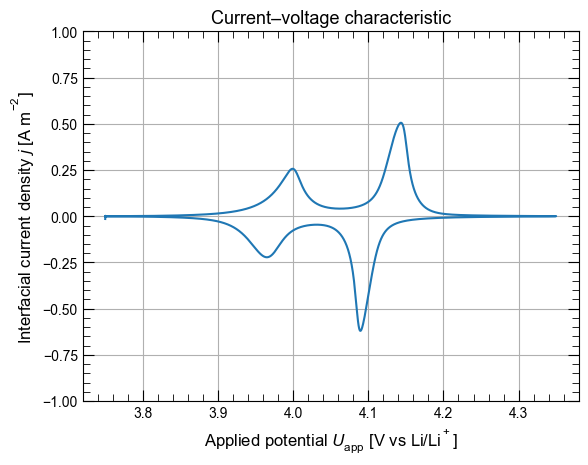

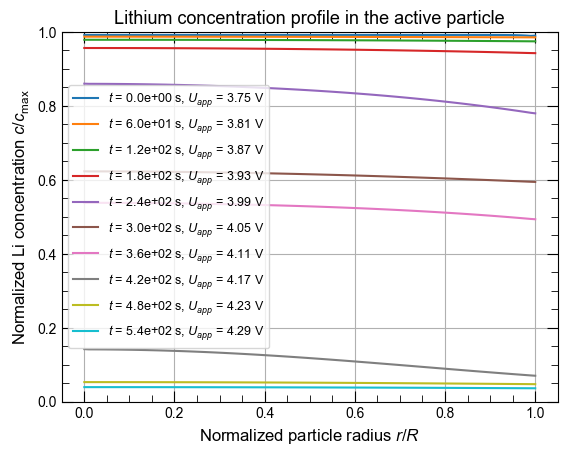

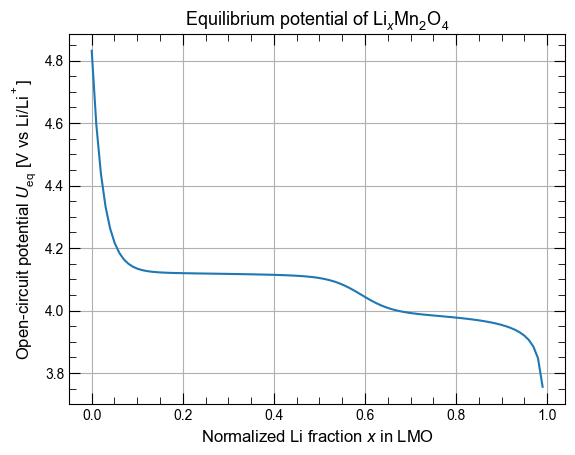

In [7]:
# --- 図1: 電流密度 vs 印加電位 ---
fig, ax = plt.subplots()
ax.plot(Uapp, js)
ax.set_ylim(-1, 1)
ax.set_xlabel("Applied potential $U_{\\mathrm{app}}$ [V vs Li/Li$^+$]", fontsize=12)
ax.set_ylabel("Interfacial current density $j$ [A m$^{-2}$]", fontsize=12)
ax.set_title("Current–voltage characteristic", fontsize=13)
ax.grid(True)
fig.savefig("current_voltage_characteristic.png", dpi=300, bbox_inches="tight")

# --- 図2: 濃度分布の時間発展 ---
fig, ax = plt.subplots()
for i in range(0, Ntau // 2, Ntau // 20):
    ax.plot(x, ydata[i, :], label=f"$t$ = {t[i]:.1e} s, $U_{{app}}$ = {Uapp[i]:.2f} V")
ax.set_ylim(0, 1)
ax.legend(fontsize=9)
ax.set_xlabel("Normalized particle radius $r / R$", fontsize=12)
ax.set_ylabel("Normalized Li concentration $c / c_{\\mathrm{max}}$", fontsize=12)
ax.set_title("Lithium concentration profile in the active particle", fontsize=13)
ax.grid(True)
fig.savefig("concentration_profile_evolution.png", dpi=300, bbox_inches="tight")

# --- 図3: LMOの平衡電位 ---
y = np.linspace(0, 1, 100)
ocv = ocv_LMO(y)
fig, ax = plt.subplots()
ax.plot(y, ocv)
ax.set_xlabel("Normalized Li fraction $x$ in LMO", fontsize=12)
ax.set_ylabel("Open-circuit potential $U_{\\mathrm{eq}}$ [V vs Li/Li$^+$]", fontsize=12)
ax.set_title("Equilibrium potential of Li$_x$Mn$_2$O$_4$", fontsize=13)
ax.grid(True)
fig.savefig("equilibrium_potential_LMO.png", dpi=300, bbox_inches="tight")

# %%
ocv_LMO(0.992)

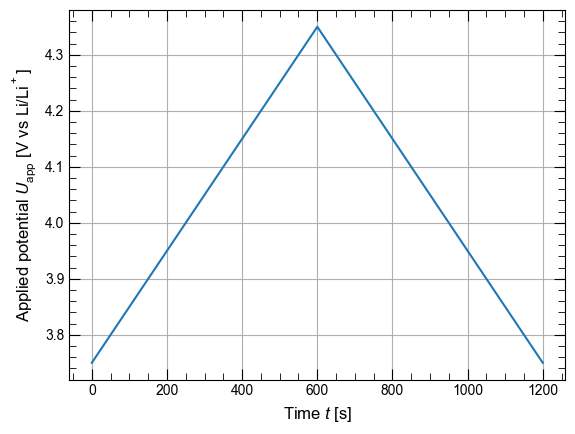

In [ ]:
# --- 図0: 印加電圧プロファイル ---
fig, ax = plt.subplots()
ax.plot(t, Uapp)
ax.set_xlabel("Time $t$ [s]", fontsize=12)
ax.set_ylabel("Applied potential $U_{\\mathrm{app}}$ [V vs Li/Li$^+$]", fontsize=12)
# ax.set_title("Applied potential profile", fontsize=13)
fig.savefig("applied_potential_profile.png", dpi=300, bbox_inches="tight")
ax.grid(True)